In [37]:
from transform2d import Transform2D
%load_ext autoreload
%autoreload 2
import wandb

from wandb_utils import *

api = wandb.Api()
run = example_train_run(api)
run = RunWrapper(run)

manager = RunDataManager(Path('../run_data'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
run = RunWrapper(api.run('romeu/NeRF2D/qyxltox2'))

In [29]:
data_art = first_used_artifact_of_type(run.run, 'dataset')
model_art = first_logged_artifact_of_type(run.run, 'model')

dm = load_dm(data_art, model_art)

wandb:   406 of 406 files downloaded.  
wandb:   1 of 1 files downloaded.  


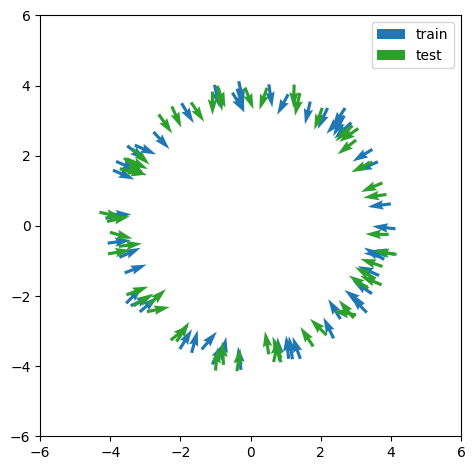

In [36]:
from matplotlib import pyplot as plt
import torch

train_poses = dm.train_poses

def plot_poses(dm: NeRF2D_Datamodule):
    camera_poses = [
        ('train', dm.train_poses, 'tab:blue'),
        ('test', dm.test_poses, 'tab:green')
    ]

    fig, ax = plt.subplots()
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    ax.set_aspect('equal', 'box')

    for name, poses, color in camera_poses:
        c2ws = [Transform2D.from_matrix(pose) for pose in poses]
        positions = torch.stack([pose.translation() for pose in c2ws])
        angles = torch.stack([pose.rotation() for pose in c2ws])

        dx = torch.cos(angles)
        dy = torch.sin(angles)
        d = torch.stack([dx, dy], dim=1)

        plt.quiver(positions[:, 0], positions[:, 1], d[:, 0], d[:, 1], color=color, label=name)

    plt.legend()
    fig.tight_layout()

plot_poses(dm)